# Loading two different jgrid worldgris and reprojecting one on another

This notebook shows how you can use `jgrid_utils` to load jgrid with different projection/geotransform into the same reference.

In [1]:
import pylab as pl
import numpy as np
import matplotlib.cm as cm
import rastercube.jgrid as jgrid
import rastercube.jgrid.utils as jgrid_utils
import rastercube.regions as regions
import rastercube.datasources.glcf as terra_glcf

%matplotlib inline
np.set_printoptions(precision=5, suppress=True)

In [2]:
glcf_header = jgrid.load('hdfs:///user/terrai/worldgrid/glcf/2004')
ndvi_header = jgrid.load('hdfs:///user/terrai/worldgrid/modis_test2/ndvi')
poly = regions.polygon_for_region("test_zones_1.h12v11_1")

# Load in NDVI projection

In [3]:
reload(jgrid_utils)
ndvi_xy_from, ndvi_data, ndvi_mask, glcf_data, glcf_mask = \
    jgrid_utils.load_poly_latlng_from_multi_jgrids([ndvi_header, glcf_header], poly)

arr dtype :  uint8  => gdal dtype :  Byte
arr dtype :  uint8  => gdal dtype :  Byte


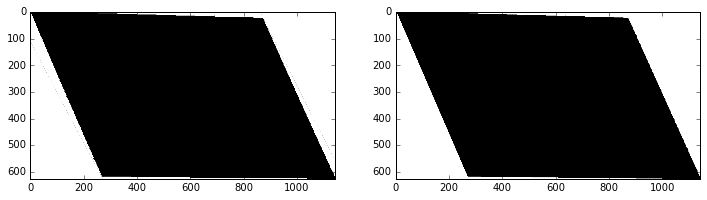

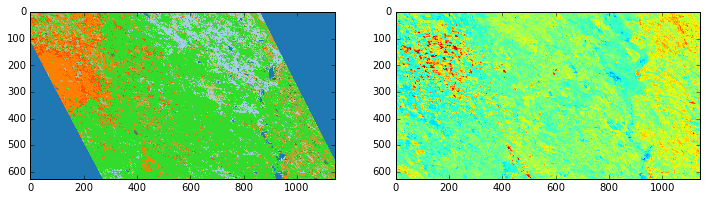

In [4]:
pl.figure(figsize=(12, 10))
pl.subplot(121)
pl.imshow(glcf_mask, cmap=cm.binary)
pl.subplot(122)
pl.imshow(ndvi_mask, cmap=cm.binary)

pl.figure(figsize=(12, 10))
pl.subplot(121)
pl.imshow(terra_glcf.glcf_to_rgb(glcf_data))
pl.subplot(122)
pl.imshow(ndvi_data[:,:,150])

# Load in GLCF projection

In [5]:
reload(jgrid_utils)
glcf_xy_from, glcf_data, glcf_mask, ndvi_data, ndvi_mask,  = \
    jgrid_utils.load_poly_latlng_from_multi_jgrids([glcf_header, ndvi_header], poly)

arr dtype :  float32  => gdal dtype :  Float32
arr dtype :  uint8  => gdal dtype :  Byte


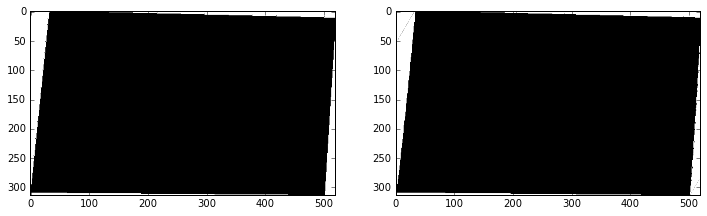

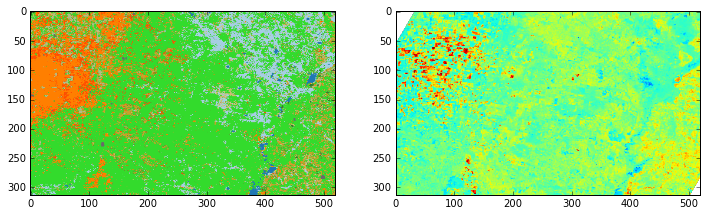

In [7]:
pl.figure(figsize=(12, 10))
pl.subplot(121)
pl.imshow(glcf_mask, cmap=cm.binary)
pl.subplot(122)
pl.imshow(ndvi_mask, cmap=cm.binary)

pl.figure(figsize=(12, 10))
pl.subplot(121)
pl.imshow(terra_glcf.glcf_to_rgb(glcf_data.squeeze()))
pl.subplot(122)
pl.imshow(ndvi_data[:,:,150])